#                       EXTRACTING RAW DATA FROM AMAZON

In [ ]:
from selenium import webdriver

In [35]:
dr=webdriver.Chrome()

In [36]:
dr.maximize_window()

In [37]:
dr.get('https://www.amazon.in/')

In [39]:
mb=dr.find_element_by_xpath("//a[normalize-space()='Electronics']")

In [40]:
mb.click()

In [41]:
s=dr.find_element_by_xpath("//span[normalize-space()='Laptops & Accessories']")

In [42]:
s.click()

In [43]:
m=dr.find_element_by_xpath("//span[@dir='auto'][normalize-space()='Laptops']")

In [44]:
m.click()

In [45]:
v=dr.find_element_by_xpath("//span[@class='a-size-base a-color-base'][normalize-space()='Intel Core i5']")

In [46]:
v.click()

In [47]:
s='document.querySelector(".sg-col-20-of-24.s-matching-dir.sg-col-16-of-20.sg-col.sg-col-8-of-12.sg-col-12-of-16")'

In [48]:
fn = dr.execute_script('return'+' '+s)

In [49]:
fn

<selenium.webdriver.remote.webelement.WebElement (session="97153e60522e856c8ee7cb00433781f2", element="debca64f-d6c6-4ee0-8702-45805828b8bd")>

In [50]:
n = fn.text 

In [51]:
n

'Results\nSponsored\nLenovo IdeaPad Gaming 3 Intel Core i5 11th Gen 15.6" (39.62cm) FHD IPS Gaming Laptop (8GB/512GB SSD/4GB NVIDIA GTX 1650/120Hz/Win 11/Backlit/3months Game Pass/Shadow Black/2.25Kg), 82K10198IN\n4.1\n(497)\n₹55,990 M.R.P:\n₹82,490 (32% off)\nNo Cost EMI available on select cards.\nGet it by Tomorrow, 26 March\nFREE Delivery by Amazon\nSponsored\nLenovo IdeaPad Gaming 3 Intel Core i5 11th Gen 15.6" (39.62cm) FHD IPS Gaming Laptop (16GB/512GB SDD/4GB NVIDIA RTX 3050/120Hz/Win11/Office 2021/Backlit/Shadow Black/2.25Kg),82K101EBIN\n3.9\n(31)\n₹65,990 M.R.P:\n₹1,05,890 (38% off)\nSave extra with No Cost EMI\nGet it by Tomorrow, 26 March\nFREE Delivery by Amazon\nSponsored\nLenovo IdeaPad Gaming 3 Intel Core i5 12th Gen 15.6" (39.62cm) FHD IPS Gaming Laptop (16GB/512GB SDD/4GB NVIDIA RTX 3050/120Hz/Win11/Office 2021/Backlit/3months Game Pass/Onyx Grey/2.32Kg), 82S900R6IN\n4.2\n(9)\n₹83,613 M.R.P:\n₹1,11,190 (25% off)\n10% Off on SBI Credit Cards\nGet it by Tomorrow, 26 Mar

In [52]:
raw = n.split('\n')

In [53]:
raw

['Results',
 'Sponsored',
 'Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen 15.6" (39.62cm) FHD IPS Gaming Laptop (8GB/512GB SSD/4GB NVIDIA GTX 1650/120Hz/Win 11/Backlit/3months Game Pass/Shadow Black/2.25Kg), 82K10198IN',
 '4.1',
 '(497)',
 '₹55,990 M.R.P:',
 '₹82,490 (32% off)',
 'No Cost EMI available on select cards.',
 'Get it by Tomorrow, 26 March',
 'FREE Delivery by Amazon',
 'Sponsored',
 'Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen 15.6" (39.62cm) FHD IPS Gaming Laptop (16GB/512GB SDD/4GB NVIDIA RTX 3050/120Hz/Win11/Office 2021/Backlit/Shadow Black/2.25Kg),82K101EBIN',
 '3.9',
 '(31)',
 '₹65,990 M.R.P:',
 '₹1,05,890 (38% off)',
 'Save extra with No Cost EMI',
 'Get it by Tomorrow, 26 March',
 'FREE Delivery by Amazon',
 'Sponsored',
 'Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen 15.6" (39.62cm) FHD IPS Gaming Laptop (16GB/512GB SDD/4GB NVIDIA RTX 3050/120Hz/Win11/Office 2021/Backlit/3months Game Pass/Onyx Grey/2.32Kg), 82S900R6IN',
 '4.2',
 '(9)',
 '₹83,613 M.R.P:',
 '₹1,

# EXTRACTING COLUMNS FROM RAW DATA

In [54]:
title = []
for i in raw:
    if len(i)>len('Flat INR 1000 Off on ALL Banks Cards'):
        title.append(i)

In [55]:
title

['Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen 15.6" (39.62cm) FHD IPS Gaming Laptop (8GB/512GB SSD/4GB NVIDIA GTX 1650/120Hz/Win 11/Backlit/3months Game Pass/Shadow Black/2.25Kg), 82K10198IN',
 'No Cost EMI available on select cards.',
 'Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen 15.6" (39.62cm) FHD IPS Gaming Laptop (16GB/512GB SDD/4GB NVIDIA RTX 3050/120Hz/Win11/Office 2021/Backlit/Shadow Black/2.25Kg),82K101EBIN',
 'Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen 15.6" (39.62cm) FHD IPS Gaming Laptop (16GB/512GB SDD/4GB NVIDIA RTX 3050/120Hz/Win11/Office 2021/Backlit/3months Game Pass/Onyx Grey/2.32Kg), 82S900R6IN',
 '(Renewed) Dell Latitude E5470 Intel Core i5 6th Gen.6200u Processor 14.1 Inches HD Screen Notebook Computer (8 GB Ram & 256 GB SSD, Windows 10 Pro, 1.71Kg)',
 'ASUS TUF Dash F15 (2022), 15.6" (39.62 cms) FHD 144Hz, Intel Core i5-12450H 12th Gen, 4GB GeForce RTX 3050 Graphics, Gaming Laptop (16GB/512GB SSD/Windows 11/with Office/Black/2 kg), FX517ZC-HN084WS',
 'AS

In [56]:
rating = []
total_reviews = []
offerprice = []
Actualprice = []
for i in title:
    if i in raw:
        t = raw.index(i)
        rating.append(raw[t+1])
        total_reviews.append(raw[t+2])
        offerprice.append(raw[t+3])
        Actualprice.append(raw[t+4])

In [57]:
rating

['4.1',
 'Get it by Tomorrow, 26 March',
 '3.9',
 '4.2',
 '3.6',
 '4.4',
 '4.1',
 '3.6',
 '4.2',
 '4.1',
 '3.2',
 '4.1',
 '4.1',
 '3.9',
 '4.1',
 '4.2',
 '4.3',
 '4.0',
 '3.3',
 '3.5',
 '4.0',
 '4.2',
 '4.0',
 '4.3',
 '4.2',
 'New to Amazon',
 '2.7',
 '4.1',
 '4.1',
 '4.2',
 '3.6',
 '4.1']

In [58]:
total_reviews

['(497)',
 'FREE Delivery by Amazon',
 '(31)',
 '(9)',
 '(873)',
 '(127)',
 '(210)',
 '(4)',
 '(193)',
 '(976)',
 '(142)',
 '(180)',
 '(140)',
 '(149)',
 '(497)',
 '(85)',
 '(1,755)',
 '(580)',
 '(379)',
 '(104)',
 '(170)',
 '(85)',
 '(21)',
 '(7)',
 '(108)',
 '₹22,990 M.R.P.:',
 '(8)',
 '(549)',
 '(391)',
 '(497)',
 '(8)',
 '(140)']

In [59]:
offerprice

['₹55,990 M.R.P:',
 'Sponsored',
 '₹65,990 M.R.P:',
 '₹83,613 M.R.P:',
 '₹16,990 M.R.P.:',
 'Deal of the Day',
 'Deal of the Day',
 '₹52,990 M.R.P:',
 '₹66,490 M.R.P:',
 '₹58,490 M.R.P:',
 '₹26,640 M.R.P.:',
 'Deal of the Day',
 '₹56,990 M.R.P:',
 '₹54,990 M.R.P:',
 '₹59,990 M.R.P:',
 '₹59,990 M.R.P:',
 'Deal of the Day',
 '₹42,990 M.R.P:',
 '₹18,710 M.R.P.:',
 '₹16,082 M.R.P.:',
 '₹61,491 M.R.P:',
 '₹59,990 M.R.P:',
 '₹25,050 M.R.P.:',
 'Deal of the Day',
 '₹68,990 M.R.P:',
 '₹89,990 (74% off)',
 '₹22,604 M.R.P.:',
 'Deal of the Day',
 '₹64,990 M.R.P:',
 '₹62,990 M.R.P:',
 '₹22,462 M.R.P.:',
 '₹56,990 M.R.P:']

In [60]:
Actualprice

['₹82,490 (32% off)',
 'Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen 15.6" (39.62cm) FHD IPS Gaming Laptop (16GB/512GB SDD/4GB NVIDIA RTX 3050/120Hz/Win11/Office 2021/Backlit/Shadow Black/2.25Kg),82K101EBIN',
 '₹1,05,890 (38% off)',
 '₹1,11,190 (25% off)',
 '₹1,29,000 (86% off)',
 '₹76,990 M.R.P:',
 '₹39,990 M.R.P:',
 '₹60,599 (13% off)',
 '₹78,294 (15% off)',
 '₹67,832 (14% off)',
 '₹60,000 (55% off)',
 '₹61,990 M.R.P:',
 '₹80,290 (29% off)',
 '₹1,00,590 (45% off)',
 '₹82,490 (27% off)',
 '₹97,890 (39% off)',
 '₹56,999 M.R.P:',
 '₹57,999 (26% off)',
 '₹50,000 (62% off)',
 '₹70,000 (77% off)',
 '₹75,059 (18% off)',
 '₹97,890 (39% off)',
 '₹50,000 (49% off)',
 '₹55,990 M.R.P:',
 '₹1,06,290 (35% off)',
 'Get it by Sunday, 2 April',
 '₹1,00,000 (77% off)',
 '₹47,990 M.R.P:',
 '₹83,039 (22% off)',
 '₹88,999 (29% off)',
 '₹60,000 (62% off)',
 '₹80,290 (29% off)']

In [61]:
total_reviews = [i[1:-1] for i in total_reviews]

In [62]:
total_reviews

['497',
 'REE Delivery by Amazo',
 '31',
 '9',
 '873',
 '127',
 '210',
 '4',
 '193',
 '976',
 '142',
 '180',
 '140',
 '149',
 '497',
 '85',
 '1,755',
 '580',
 '379',
 '104',
 '170',
 '85',
 '21',
 '7',
 '108',
 '22,990 M.R.P.',
 '8',
 '549',
 '391',
 '497',
 '8',
 '140']

In [63]:
rating

['4.1',
 'Get it by Tomorrow, 26 March',
 '3.9',
 '4.2',
 '3.6',
 '4.4',
 '4.1',
 '3.6',
 '4.2',
 '4.1',
 '3.2',
 '4.1',
 '4.1',
 '3.9',
 '4.1',
 '4.2',
 '4.3',
 '4.0',
 '3.3',
 '3.5',
 '4.0',
 '4.2',
 '4.0',
 '4.3',
 '4.2',
 'New to Amazon',
 '2.7',
 '4.1',
 '4.1',
 '4.2',
 '3.6',
 '4.1']

In [64]:
su = 0
for i in rating:
    try:
        su= su+float(i)
    except:
        pass
me = su/len(rating)-1

In [65]:
me

2.6999999999999997

In [66]:
for i in rating:
    if '₹' in i:
        rating[rating.index(i)]=me

In [67]:
rating

['4.1',
 'Get it by Tomorrow, 26 March',
 '3.9',
 '4.2',
 '3.6',
 '4.4',
 '4.1',
 '3.6',
 '4.2',
 '4.1',
 '3.2',
 '4.1',
 '4.1',
 '3.9',
 '4.1',
 '4.2',
 '4.3',
 '4.0',
 '3.3',
 '3.5',
 '4.0',
 '4.2',
 '4.0',
 '4.3',
 '4.2',
 'New to Amazon',
 '2.7',
 '4.1',
 '4.1',
 '4.2',
 '3.6',
 '4.1']

In [68]:
import pandas as pd

In [69]:
data = pd.DataFrame({'ProductTitle':title,'Rating':rating,'Totalreviews':total_reviews,'OfferPrice':offerprice,'ActualPrice':Actualprice})

# DATA

In [70]:
data

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,4.1,497,"₹55,990 M.R.P:","₹82,490 (32% off)"
1,No Cost EMI available on select cards.,"Get it by Tomorrow, 26 March",REE Delivery by Amazo,Sponsored,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...
2,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,3.9,31,"₹65,990 M.R.P:","₹1,05,890 (38% off)"
3,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,4.2,9,"₹83,613 M.R.P:","₹1,11,190 (25% off)"
4,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,3.6,873,"₹16,990 M.R.P.:","₹1,29,000 (86% off)"
5,"ASUS TUF Dash F15 (2022), 15.6"" (39.62 cms) FH...",4.4,127,Deal of the Day,"₹76,990 M.R.P:"
6,"ASUS VivoBook 14 (2021),Intel Core i5-1035G1 1...",4.1,210,Deal of the Day,"₹39,990 M.R.P:"
7,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",3.6,4,"₹52,990 M.R.P:","₹60,599 (13% off)"
8,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,4.2,193,"₹66,490 M.R.P:","₹78,294 (15% off)"
9,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",4.1,976,"₹58,490 M.R.P:","₹67,832 (14% off)"


In [71]:
data.to_csv("Amazon_data.csv",index=False)

In [349]:
import pandas as pd

In [350]:
df = pd.read_csv('Amazon_data.csv')

In [351]:
df

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,4.1,497,"₹55,990 M.R.P:","₹82,490 (32% off)"
1,No Cost EMI available on select cards.,"Get it by Tomorrow, 26 March",REE Delivery by Amazo,Sponsored,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...
2,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,3.9,31,"₹65,990 M.R.P:","₹1,05,890 (38% off)"
3,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,4.2,9,"₹83,613 M.R.P:","₹1,11,190 (25% off)"
4,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,3.6,873,"₹16,990 M.R.P.:","₹1,29,000 (86% off)"
5,"ASUS TUF Dash F15 (2022), 15.6"" (39.62 cms) FH...",4.4,127,Deal of the Day,"₹76,990 M.R.P:"
6,"ASUS VivoBook 14 (2021),Intel Core i5-1035G1 1...",4.1,210,Deal of the Day,"₹39,990 M.R.P:"
7,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",3.6,4,"₹52,990 M.R.P:","₹60,599 (13% off)"
8,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,4.2,193,"₹66,490 M.R.P:","₹78,294 (15% off)"
9,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",4.1,976,"₹58,490 M.R.P:","₹67,832 (14% off)"


In [352]:
df =df.drop(index=1)

In [353]:
df =df.drop(index=5)

In [354]:
df

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,4.1,497,"₹55,990 M.R.P:","₹82,490 (32% off)"
2,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,3.9,31,"₹65,990 M.R.P:","₹1,05,890 (38% off)"
3,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,4.2,9,"₹83,613 M.R.P:","₹1,11,190 (25% off)"
4,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,3.6,873,"₹16,990 M.R.P.:","₹1,29,000 (86% off)"
6,"ASUS VivoBook 14 (2021),Intel Core i5-1035G1 1...",4.1,210,Deal of the Day,"₹39,990 M.R.P:"
7,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",3.6,4,"₹52,990 M.R.P:","₹60,599 (13% off)"
8,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,4.2,193,"₹66,490 M.R.P:","₹78,294 (15% off)"
9,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",4.1,976,"₹58,490 M.R.P:","₹67,832 (14% off)"
10,(Renewed) DELL Latitude 5490 Core i5 8th Gen L...,3.2,142,"₹26,640 M.R.P.:","₹60,000 (55% off)"
11,Acer Aspire 5 Gaming Laptop Intel Core i5 12th...,4.1,180,Deal of the Day,"₹61,990 M.R.P:"


In [355]:
df =df.drop(index=6)

In [356]:
df =df.drop(index=11)

In [357]:
df =df.drop(index=16)

In [358]:
df =df.drop(index=23)

In [359]:
df =df.drop(index=25)

In [360]:
df =df.drop(index=27)

In [361]:
df

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,4.1,497,"₹55,990 M.R.P:","₹82,490 (32% off)"
2,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,3.9,31,"₹65,990 M.R.P:","₹1,05,890 (38% off)"
3,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,4.2,9,"₹83,613 M.R.P:","₹1,11,190 (25% off)"
4,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,3.6,873,"₹16,990 M.R.P.:","₹1,29,000 (86% off)"
7,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",3.6,4,"₹52,990 M.R.P:","₹60,599 (13% off)"
8,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,4.2,193,"₹66,490 M.R.P:","₹78,294 (15% off)"
9,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",4.1,976,"₹58,490 M.R.P:","₹67,832 (14% off)"
10,(Renewed) DELL Latitude 5490 Core i5 8th Gen L...,3.2,142,"₹26,640 M.R.P.:","₹60,000 (55% off)"
12,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.1,140,"₹56,990 M.R.P:","₹80,290 (29% off)"
13,Fujitsu CH Intel Evo Core i5 11th Gen 13.3â€ ...,3.9,149,"₹54,990 M.R.P:","₹1,00,590 (45% off)"


In [362]:
df1 = df.reset_index(drop=True)

In [363]:
df1

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,4.1,497,"₹55,990 M.R.P:","₹82,490 (32% off)"
1,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,3.9,31,"₹65,990 M.R.P:","₹1,05,890 (38% off)"
2,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,4.2,9,"₹83,613 M.R.P:","₹1,11,190 (25% off)"
3,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,3.6,873,"₹16,990 M.R.P.:","₹1,29,000 (86% off)"
4,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",3.6,4,"₹52,990 M.R.P:","₹60,599 (13% off)"
5,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,4.2,193,"₹66,490 M.R.P:","₹78,294 (15% off)"
6,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",4.1,976,"₹58,490 M.R.P:","₹67,832 (14% off)"
7,(Renewed) DELL Latitude 5490 Core i5 8th Gen L...,3.2,142,"₹26,640 M.R.P.:","₹60,000 (55% off)"
8,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,4.1,140,"₹56,990 M.R.P:","₹80,290 (29% off)"
9,Fujitsu CH Intel Evo Core i5 11th Gen 13.3â€ ...,3.9,149,"₹54,990 M.R.P:","₹1,00,590 (45% off)"


In [364]:
from sklearn.preprocessing import LabelEncoder

In [365]:
lb=LabelEncoder()

In [366]:
df1['Rating']=lb.fit_transform(df1['Rating'])

In [367]:
df1

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,7,497,"₹55,990 M.R.P:","₹82,490 (32% off)"
1,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,5,31,"₹65,990 M.R.P:","₹1,05,890 (38% off)"
2,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,8,9,"₹83,613 M.R.P:","₹1,11,190 (25% off)"
3,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,4,873,"₹16,990 M.R.P.:","₹1,29,000 (86% off)"
4,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",4,4,"₹52,990 M.R.P:","₹60,599 (13% off)"
5,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,8,193,"₹66,490 M.R.P:","₹78,294 (15% off)"
6,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",7,976,"₹58,490 M.R.P:","₹67,832 (14% off)"
7,(Renewed) DELL Latitude 5490 Core i5 8th Gen L...,1,142,"₹26,640 M.R.P.:","₹60,000 (55% off)"
8,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,7,140,"₹56,990 M.R.P:","₹80,290 (29% off)"
9,Fujitsu CH Intel Evo Core i5 11th Gen 13.3â€ ...,5,149,"₹54,990 M.R.P:","₹1,00,590 (45% off)"


In [368]:
import re
import pandas as pd

In [369]:
# Extract the numerical value from the column using regular expressions
df1['ActualPrice'] = df1['ActualPrice'].str.extract(r'₹([\d,]+)')


In [370]:
# Remove any commas from the string
df1['ActualPrice'] = df1['ActualPrice'].str.replace(',', '')


In [371]:
# Convert the string to a numeric data type
df1['ActualPrice'] = pd.to_numeric(df1['ActualPrice'])

In [372]:
df1             #The Actual price values has been changed

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,7,497,"₹55,990 M.R.P:",82490
1,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,5,31,"₹65,990 M.R.P:",105890
2,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,8,9,"₹83,613 M.R.P:",111190
3,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,4,873,"₹16,990 M.R.P.:",129000
4,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",4,4,"₹52,990 M.R.P:",60599
5,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,8,193,"₹66,490 M.R.P:",78294
6,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",7,976,"₹58,490 M.R.P:",67832
7,(Renewed) DELL Latitude 5490 Core i5 8th Gen L...,1,142,"₹26,640 M.R.P.:",60000
8,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,7,140,"₹56,990 M.R.P:",80290
9,Fujitsu CH Intel Evo Core i5 11th Gen 13.3â€ ...,5,149,"₹54,990 M.R.P:",100590


In [373]:
df1['OfferPrice'] = df1['OfferPrice'].str.replace(',', '').str.extract(r'₹(\d+)')[0].astype(int)

In [374]:
df1                                      #The values of Offerprice has been changed

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,7,497,55990,82490
1,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,5,31,65990,105890
2,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,8,9,83613,111190
3,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,4,873,16990,129000
4,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",4,4,52990,60599
5,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,8,193,66490,78294
6,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",7,976,58490,67832
7,(Renewed) DELL Latitude 5490 Core i5 8th Gen L...,1,142,26640,60000
8,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,7,140,56990,80290
9,Fujitsu CH Intel Evo Core i5 11th Gen 13.3â€ ...,5,149,54990,100590


In [375]:
df1['Brand'] = df1['ProductTitle'].apply(lambda x: x.split()[0])

In [376]:
df1

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,7,497,55990,82490,Lenovo
1,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,5,31,65990,105890,Lenovo
2,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,8,9,83613,111190,Lenovo
3,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,4,873,16990,129000,(Renewed)
4,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",4,4,52990,60599,HP
5,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,8,193,66490,78294,HP
6,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",7,976,58490,67832,HP
7,(Renewed) DELL Latitude 5490 Core i5 8th Gen L...,1,142,26640,60000,(Renewed)
8,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,7,140,56990,80290,Lenovo
9,Fujitsu CH Intel Evo Core i5 11th Gen 13.3â€ ...,5,149,54990,100590,Fujitsu


In [377]:
df1['Brand'] = df1['Brand'].apply(lambda x: x.replace('(Renewed)', 'DELL'))   #From the data it was Dell which has (renewed)

In [378]:
df1

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,7,497,55990,82490,Lenovo
1,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,5,31,65990,105890,Lenovo
2,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,8,9,83613,111190,Lenovo
3,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,4,873,16990,129000,DELL
4,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",4,4,52990,60599,HP
5,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,8,193,66490,78294,HP
6,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",7,976,58490,67832,HP
7,(Renewed) DELL Latitude 5490 Core i5 8th Gen L...,1,142,26640,60000,DELL
8,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,7,140,56990,80290,Lenovo
9,Fujitsu CH Intel Evo Core i5 11th Gen 13.3â€ ...,5,149,54990,100590,Fujitsu


In [379]:
df1.loc[14, 'Brand'] = 'Lenovo'       #But we notice that 14th index was lenovo 

In [380]:
df1

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,7,497,55990,82490,Lenovo
1,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,5,31,65990,105890,Lenovo
2,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,8,9,83613,111190,Lenovo
3,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,4,873,16990,129000,DELL
4,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",4,4,52990,60599,HP
5,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,8,193,66490,78294,HP
6,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",7,976,58490,67832,HP
7,(Renewed) DELL Latitude 5490 Core i5 8th Gen L...,1,142,26640,60000,DELL
8,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,7,140,56990,80290,Lenovo
9,Fujitsu CH Intel Evo Core i5 11th Gen 13.3â€ ...,5,149,54990,100590,Fujitsu


# UPDATED DATA AFTER CLEANING 

In [381]:
df1.to_csv("Amazon.csv",index=False)

In [382]:
df_new = pd.read_csv("Amazon.csv")

In [395]:
df_new

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,7,497,55990,82490,Lenovo
1,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,5,31,65990,105890,Lenovo
2,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,8,9,83613,111190,Lenovo
3,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,4,873,16990,129000,DELL
4,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",4,4,52990,60599,HP
5,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,8,193,66490,78294,HP
6,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",7,976,58490,67832,HP
7,(Renewed) DELL Latitude 5490 Core i5 8th Gen L...,1,142,26640,60000,DELL
8,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,7,140,56990,80290,Lenovo
9,Fujitsu CH Intel Evo Core i5 11th Gen 13.3â€ ...,5,149,54990,100590,Fujitsu


In [396]:
df_new.isnull().sum()

ProductTitle    0
Rating          0
Totalreviews    0
OfferPrice      0
ActualPrice     0
Brand           0
dtype: int64

In [397]:
df_new.columns

Index(['ProductTitle', 'Rating', 'Totalreviews', 'OfferPrice', 'ActualPrice',
       'Brand'],
      dtype='object')

In [398]:
df_new.describe().style.background_gradient(cmap='Blues')

,Rating,Totalreviews,OfferPrice,ActualPrice
count,24.000000,24.000000,24.000000,24.000000
mean,5.666667,253.625000,49270.500000,82338.375000
std,2.352920,274.345833,19797.952845,20753.947264
min,0.000000,4.000000,16082.000000,50000.000000
25%,4.000000,71.500000,26242.500000,66023.750000
50%,6.500000,141.000000,56990.000000,81390.000000
75%,7.250000,417.500000,61865.750000,98417.500000
max,8.000000,976.000000,83613.000000,129000.000000


In [399]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductTitle  24 non-null     object
 1   Rating        24 non-null     int64 
 2   Totalreviews  24 non-null     int64 
 3   OfferPrice    24 non-null     int64 
 4   ActualPrice   24 non-null     int64 
 5   Brand         24 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.2+ KB


In [400]:
df_new.head()

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,7,497,55990,82490,Lenovo
1,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,5,31,65990,105890,Lenovo
2,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,8,9,83613,111190,Lenovo
3,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,4,873,16990,129000,DELL
4,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",4,4,52990,60599,HP


In [401]:
df_new.tail()

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
19,(Renewed) DELL Latitude 5490 Core i5 7th Gen L...,0,8,22604,100000,DELL
20,HP Victus Gaming Latest 12th Gen Intel Core i5...,7,391,64990,83039,HP
21,Acer Nitro 5 Gaming Laptop Intel Core i5-11400...,8,497,62990,88999,Acer
22,"(Renewed) DELL LATITUDE 7490, Windows 10 Pro, ...",4,8,22462,60000,DELL
23,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,7,140,56990,80290,Lenovo


In [402]:
print(df_new.dtypes)

ProductTitle    object
Rating           int64
Totalreviews     int64
OfferPrice       int64
ActualPrice      int64
Brand           object
dtype: object


# COSTLY LAPTOPS

In [403]:
Costly_Laptops = df_new[(df_new['OfferPrice'] > 55990)]

In [404]:
Costly_Laptops         #13 costly laptops we have and Lenovo laptops are much costly than other brands

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
1,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,5,31,65990,105890,Lenovo
2,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,8,9,83613,111190,Lenovo
5,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,8,193,66490,78294,HP
6,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",7,976,58490,67832,HP
8,Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen 1...,7,140,56990,80290,Lenovo
10,Lenovo IdeaPad Slim 3 Intel Core i5 12th Gen 1...,7,497,59990,82490,Lenovo
11,Lenovo IdeaPad Slim 5 Intel Core i5 11th Gen 1...,8,85,59990,97890,Lenovo
15,"HP 15s, 12th Gen Intel Core i5 16GB RAM/512GB ...",6,170,61491,75059,HP
16,Lenovo IdeaPad Slim 5 Intel Core i5 11th Gen 1...,8,85,59990,97890,Lenovo
18,Lenovo Yoga Slim 7 Pro Intel Evo Core i5-11320...,8,108,68990,106290,Lenovo


In [405]:
Top_Rated_Laptops=df_new[(df_new['Rating'] > 7)]

# TOP RATED LAPTOPS

In [406]:
Top_Rated_Laptops

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
2,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,8,9,83613,111190,Lenovo
5,HP Pavilion 14 12th Gen Intel Core i5 16GB RAM...,8,193,66490,78294,HP
11,Lenovo IdeaPad Slim 5 Intel Core i5 11th Gen 1...,8,85,59990,97890,Lenovo
16,Lenovo IdeaPad Slim 5 Intel Core i5 11th Gen 1...,8,85,59990,97890,Lenovo
18,Lenovo Yoga Slim 7 Pro Intel Evo Core i5-11320...,8,108,68990,106290,Lenovo
21,Acer Nitro 5 Gaming Laptop Intel Core i5-11400...,8,497,62990,88999,Acer


In [407]:
Least_rated_Laptops = df_new[(df_new['Rating'] < 5)]

# LEAST RATED LAPTOPS

In [408]:
Least_rated_Laptops 

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
3,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,4,873,16990,129000,DELL
4,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",4,4,52990,60599,HP
7,(Renewed) DELL Latitude 5490 Core i5 8th Gen L...,1,142,26640,60000,DELL
13,(Renewed) Dell Latitude Laptop E7470 Intel Cor...,2,379,18710,50000,DELL
14,(Renewed) Lenovo ThinkPad X260 High Performanc...,3,104,16082,70000,Lenovo
19,(Renewed) DELL Latitude 5490 Core i5 7th Gen L...,0,8,22604,100000,DELL
22,"(Renewed) DELL LATITUDE 7490, Windows 10 Pro, ...",4,8,22462,60000,DELL


In [409]:
Highest_reviews=df_new[(df_new['Totalreviews'] > 200)]

# HIGHEST REVIEWS

In [410]:
Highest_reviews

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
0,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,7,497,55990,82490,Lenovo
3,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,4,873,16990,129000,DELL
6,"HP 15s, 12th Gen Intel Core i5 8GB RAM/512GB S...",7,976,58490,67832,HP
10,Lenovo IdeaPad Slim 3 Intel Core i5 12th Gen 1...,7,497,59990,82490,Lenovo
12,Acer Extensa 15 Lightweight Laptop Intel Core ...,6,580,42990,57999,Acer
13,(Renewed) Dell Latitude Laptop E7470 Intel Cor...,2,379,18710,50000,DELL
20,HP Victus Gaming Latest 12th Gen Intel Core i5...,7,391,64990,83039,HP
21,Acer Nitro 5 Gaming Laptop Intel Core i5-11400...,8,497,62990,88999,Acer


In [411]:
Least_reviews = df_new[(df_new['Totalreviews'] < 100)]

# LEAST REVIEWS

In [412]:
Least_reviews

,ProductTitle,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
1,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,5,31,65990,105890,Lenovo
2,Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...,8,9,83613,111190,Lenovo
4,"HP 15s, 11th Gen Intel Core i5-1155G7, 15.6 in...",4,4,52990,60599,HP
11,Lenovo IdeaPad Slim 5 Intel Core i5 11th Gen 1...,8,85,59990,97890,Lenovo
16,Lenovo IdeaPad Slim 5 Intel Core i5 11th Gen 1...,8,85,59990,97890,Lenovo
17,(Renewed) DELL Latitude 5490 Core i5 7th Gen L...,6,21,25050,50000,DELL
19,(Renewed) DELL Latitude 5490 Core i5 7th Gen L...,0,8,22604,100000,DELL
22,"(Renewed) DELL LATITUDE 7490, Windows 10 Pro, ...",4,8,22462,60000,DELL


In [413]:
Famous_brands = df_new['Brand'].value_counts()

# FAMOUS BRANDS

In [414]:
Famous_brands       #Lenovo is the famous brand 

Lenovo     10
DELL        6
HP          5
Acer        2
Fujitsu     1
Name: Brand, dtype: int64

In [415]:
import matplotlib.pyplot as plt

In [416]:
import seaborn as sns

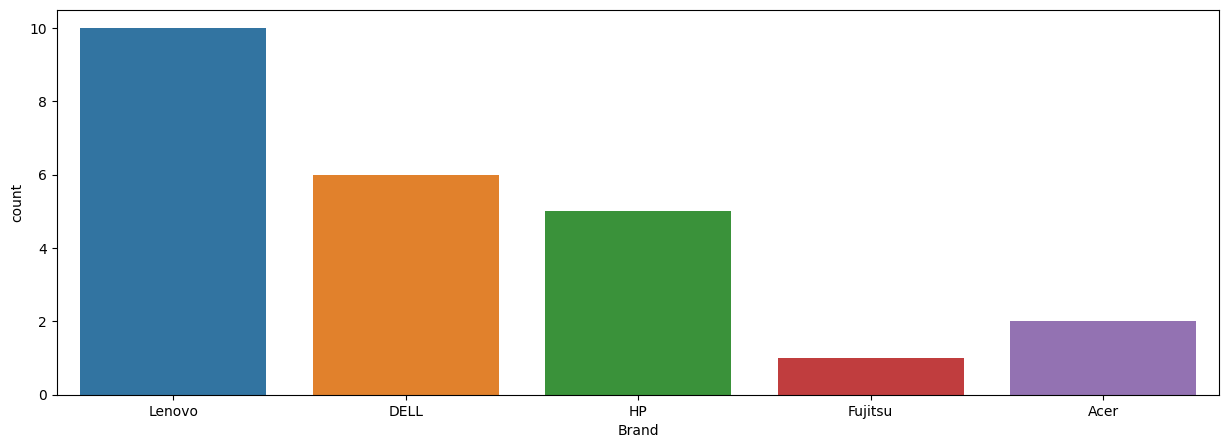

In [417]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_new,x='Brand')
plt.show()

In [418]:
import ipywidgets as widgets

In [419]:
x1 = widgets.Dropdown(
    options=df_new.columns,
    value=df_new.columns[0],
    description='X_val:',
    disabled=False,
    )

def xtake(val1):
    print('first Function', val1)
    
    x2 = widgets.Dropdown(
    options=['lineplot','scatterplot','boxplot','barplot'],
    value='lineplot',
    description='Graphs:',
    disabled=False,
    )
    
    def graphviz2(val2):
        print('Second Function',val2)
        
        if val2 == 'lineplot':
            sns.lineplot(x = val1, y = 'Brand', data = df_new)
        
        if val2 == 'scatterplot':
            sns.scatterplot(x = val1, y = 'Brand', data = df_new)
        
        if val2 == 'boxplot':
            sns.boxplot(x = val1, y = 'Brand' , data = df_new)
            
        if val2 == 'barplot':
            sns.barplot(x = val1, y = 'Brand' , data = df_new)
            
    widgets.interact(graphviz2,val2=x2)

# WIDGETS

In [420]:
widgets.interact(xtake,val1=x1)  

interactive(children=(Dropdown(description='X_val:', options=('ProductTitle', 'Rating', 'Totalreviews', 'Offer…

<function __main__.xtake(val1)>

In [421]:
df_new1 = df_new.drop(['ProductTitle'], axis=1)

In [422]:
df_new1

,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
0,7,497,55990,82490,Lenovo
1,5,31,65990,105890,Lenovo
2,8,9,83613,111190,Lenovo
3,4,873,16990,129000,DELL
4,4,4,52990,60599,HP
5,8,193,66490,78294,HP
6,7,976,58490,67832,HP
7,1,142,26640,60000,DELL
8,7,140,56990,80290,Lenovo
9,5,149,54990,100590,Fujitsu


In [423]:
df_new1['Brand']=lb.fit_transform(df_new1['Brand'])

In [424]:
df_new1

,Rating,Totalreviews,OfferPrice,ActualPrice,Brand
0,7,497,55990,82490,4
1,5,31,65990,105890,4
2,8,9,83613,111190,4
3,4,873,16990,129000,1
4,4,4,52990,60599,3
5,8,193,66490,78294,3
6,7,976,58490,67832,3
7,1,142,26640,60000,1
8,7,140,56990,80290,4
9,5,149,54990,100590,2


# HEAT MAP

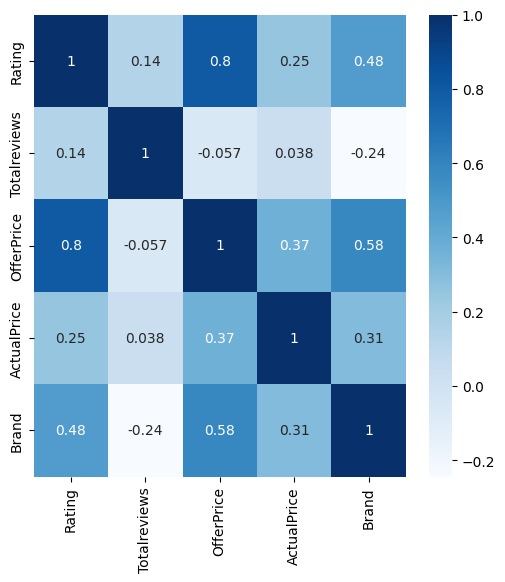

In [457]:
plt.figure(figsize=(6,6))
cmap="PiYG"
hm = sns.heatmap(data=df_new1.corr(),cmap="Blues",annot=True)
plt.show()

In [425]:
X = df_new1.drop('Brand', axis=1)

In [426]:
y = df_new1['Brand']

In [427]:
X

,Rating,Totalreviews,OfferPrice,ActualPrice
0,7,497,55990,82490
1,5,31,65990,105890
2,8,9,83613,111190
3,4,873,16990,129000
4,4,4,52990,60599
5,8,193,66490,78294
6,7,976,58490,67832
7,1,142,26640,60000
8,7,140,56990,80290
9,5,149,54990,100590


In [428]:
y

0     4
1     4
2     4
3     1
4     3
5     3
6     3
7     1
8     4
9     2
10    4
11    4
12    0
13    1
14    4
15    3
16    4
17    1
18    4
19    1
20    3
21    0
22    1
23    4
Name: Brand, dtype: int32

In [429]:
from sklearn.model_selection import train_test_split

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [431]:
X_train

,Rating,Totalreviews,OfferPrice,ActualPrice
9,5,149,54990,100590
22,4,8,22462,60000
17,6,21,25050,50000
0,7,497,55990,82490
2,8,9,83613,111190
6,7,976,58490,67832
14,3,104,16082,70000
7,1,142,26640,60000
21,8,497,62990,88999
16,8,85,59990,97890


In [432]:
y_train

9     2
22    1
17    1
0     4
2     4
6     3
14    4
7     1
21    0
16    4
4     3
13    1
19    1
8     4
11    4
18    4
23    4
5     3
1     4
Name: Brand, dtype: int32

In [433]:
X_test

,Rating,Totalreviews,OfferPrice,ActualPrice
15,6,170,61491,75059
20,7,391,64990,83039
3,4,873,16990,129000
12,6,580,42990,57999
10,7,497,59990,82490


In [434]:
y_test

15    3
20    3
3     1
12    0
10    4
Name: Brand, dtype: int32

In [435]:
from sklearn.linear_model import LogisticRegression

In [436]:
Lr = LogisticRegression()

In [437]:
Lr.fit(X_train, y_train)

C:\Users\reshm\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [445]:
y_pred = Lr.predict(X_test)

In [446]:
y_pred

array([3, 3, 1, 0, 0])

# ACCURACY SCORE

In [447]:
Lr.score(X_train,y_train)       #84% accuracy 

0.8421052631578947

In [448]:
from sklearn.metrics import accuracy_score, confusion_matrix

# HEATMAP FOR ACTUAL VS PREDICTED 

Text(50.722222222222214, 0.5, 'Actual labels')

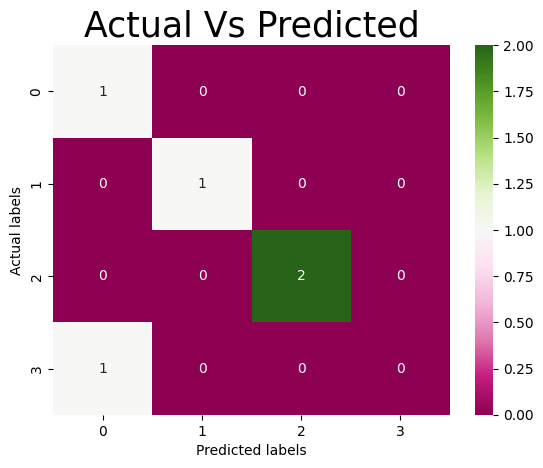

In [455]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=cmap)
plt.title('Actual Vs Predicted',fontdict={'fontsize':25,'color':'black','fontweight':10})
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')

#                   THE END

# THANK YOU